# MNIST Handwritten Digits Classification
### About the data
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

It is a dataset of images of handwritten digits of size 28 × 28 pixels. It contains a training set of 60,000 images and a test set of 10,000 images. The train and test set also has a label column which is labeled as [0,1,2,3,4,5,6,7,8,9] according to the digits in the images.

### Importing necessary libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

### Objective of the project
The main objective of the project is to create a multi-class classifier using Keras and validate its accuracy and loss.

To start, I first loaded the dataset

### Loading the data into train and test sets
We can see that `x_train` contains 60,000 images, each of size 28 × 28 pixels. Also we have 60,000 train samples and 10,000 test samples

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('X_train shape',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

X_train shape (60000, 28, 28)
60000 train samples
10000 test samples


We can see that each image is of size 28 × 28 pixels

In [3]:
x_train[10].shape

(28, 28)

Visualizing an image

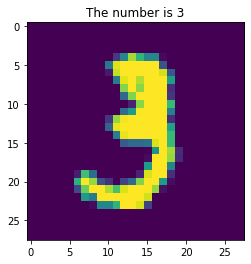

In [4]:
plt.imshow(x_train[10])
plt.title(f'The number is {y_train[10]}');

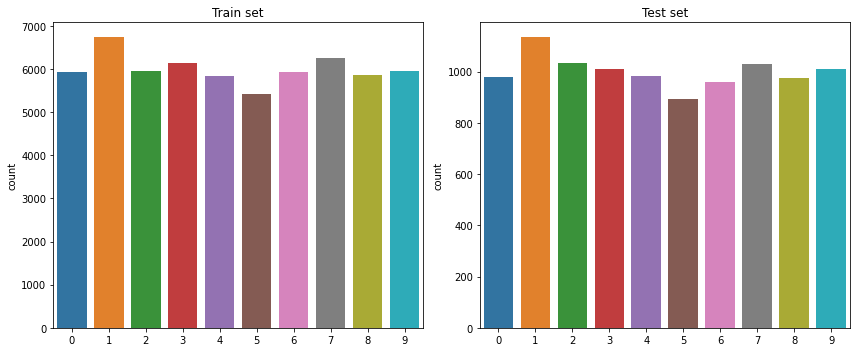

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.countplot(x=pd.Series(y_train))
plt.title('Train set')

plt.subplot(122)
sns.countplot(x=pd.Series(y_test))
plt.title('Test set')

plt.tight_layout();

We can see that all the labels are distributed normally

### Data Preprocessing
Here, we are converting the y train and test sets to categorical values from 0 to 9 (i.e. one-hot encoding them)

In [6]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [7]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Normalizing the x train and test data points

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train/255, x_test/255

## Creating our first model
In this model, we are going to perform the following workflow:

Conv2D → Conv2D → MaxPooling → Conv2D → Conv2D → MaxPooling → Flatten → Dense(512) → Dense(10)

We are also going to run the model for 15 epochs and look at its accuracy

In [9]:
model1 = Sequential()

model1.add(Conv2D(32,(5,5),padding='same',input_shape=(28,28,1)))
model1.add(Activation('relu'))
model1.add(Conv2D(32,(5,5)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(32,(5,5),padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(32,(5,5)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                        

In [11]:
opt = keras.optimizers.legacy.RMSprop(lr=0.005, decay=1e-6)

model1.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [12]:
history = model1.fit(x_train,y_train, batch_size=32, epochs=15, validation_data=(x_test,y_test),shuffle=True)

Epoch 1/15
1875/1875 [==============================] - 25s 11ms/step - loss: 0.4284 - accuracy: 0.8841 - val_loss: 0.0992 - val_accuracy: 0.9730
Epoch 2/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2975 - accuracy: 0.9395 - val_loss: 0.1717 - val_accuracy: 0.9566
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3321 - accuracy: 0.9297 - val_loss: 0.1136 - val_accuracy: 0.9683
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3672 - accuracy: 0.9249 - val_loss: 0.1267 - val_accuracy: 0.9648
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3825 - accuracy: 0.9158 - val_loss: 0.1306 - val_accuracy: 0.9623
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3901 - accuracy: 0.9107 - val_loss: 0.1568 - val_accuracy: 0.9547
Epoch 7/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4664 - accuracy: 0.9069 - val_loss: 0.1981 - val_a

In [13]:
loss, accuracy = model1.evaluate(x_test,y_test,verbose=0)
print('Accuracy: {} %'.format(round(accuracy,2)*100))

Accuracy: 94.0 %


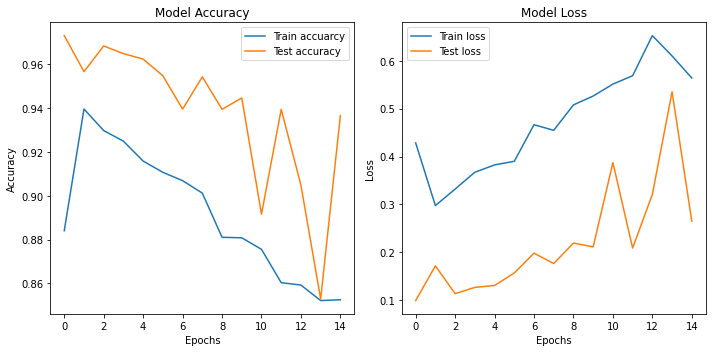

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train accuarcy','Test accuracy'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train loss','Test loss'])
plt.tight_layout()

We got a pretty good accuracy of 94% but we can see that it actually decreased overall. This may be because of too much convolutions which has actually lost information rather than gaining. We also see that the accuracy and loss increase and decrease randomly.

So, what we can do is to scale down the model which may help in better fitting the data and giving better outcomes.

### Creating a better model
In this model, we are going to perform the following workflow:

Conv2D → Conv2D → MaxPooling → Flatten → Dense(512) → Dense(10)

We are also going to run the model for 15 epochs and look at its accuracy

In [15]:
model2 = Sequential()

model2.add(Conv2D(32,(7,7),strides=(3,3),padding='same',input_shape=(28,28,1)))
model2.add(Activation('sigmoid'))
model2.add(Conv2D(32,(7,7),strides=(3,3)))
model2.add(Activation('sigmoid'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 10, 10, 32)        1600      
                                                                 
 activation_6 (Activation)   (None, 10, 10, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 32)          50208     
                                                                 
 activation_7 (Activation)   (None, 2, 2, 32)          0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 1, 1, 32)          0         
                                                      

In [17]:
opt2 = keras.optimizers.legacy.RMSprop(lr=0.0005)

model2.compile(loss='categorical_crossentropy',optimizer=opt2, metrics=['accuracy'])

In [18]:
history2 = model2.fit(x_train,y_train, batch_size=32, epochs=15, validation_data=(x_test,y_test),shuffle=True)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 1.2649 - accuracy: 0.5582 - val_loss: 0.3532 - val_accuracy: 0.8994
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4301 - accuracy: 0.8658 - val_loss: 0.2360 - val_accuracy: 0.9301
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3274 - accuracy: 0.9004 - val_loss: 0.1814 - val_accuracy: 0.9458
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2769 - accuracy: 0.9164 - val_loss: 0.1457 - val_accuracy: 0.9581
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2449 - accuracy: 0.9262 - val_loss: 0.1304 - val_accuracy: 0.9628
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2239 - accuracy: 0.9331 - val_loss: 0.1205 - val_accuracy: 0.9661
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2047 - accuracy: 0.9403 - val_loss: 0.1416 - val_accuracy:

In [19]:
loss2, accuracy2 = model2.evaluate(x_test,y_test,verbose=0)
print('Accuracy: {} %'.format(round(accuracy2,2)*100))

Accuracy: 97.0 %


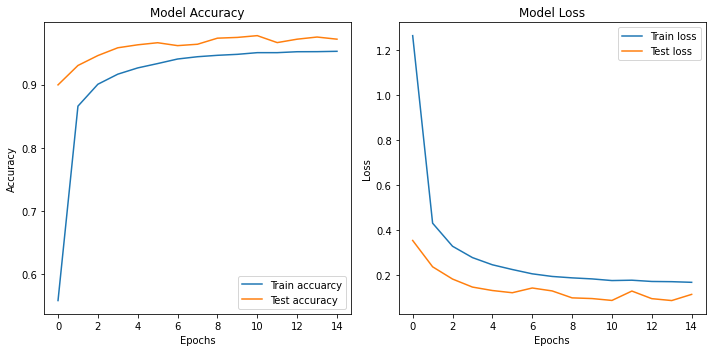

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train accuarcy','Test accuracy'])

plt.subplot(122)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train loss','Test loss'])
plt.tight_layout()

We can now see that this model performs much better than the previous one. We are getting an accuracy of ~ 97% to 98%. It also has smoother curves which means the model has not overfit on our data.

### Conclusion
Hence, we have successfully created a CNN model to classify the MNIST dataset and have achieved an accuracy of 97-98%.